# ターゲットページの形態素解析

In [239]:
from janome.tokenizer import Tokenizer
import copy
tokenizer = Tokenizer()
#1 10 5 8
sentenses = [
    "関連サイトへのリンク 先進的学習科学と工学研究会 ALST",
    "ALST研究会について 先進的学習科学と工学研究会 ALST",
    "Oracle MariaDB 移行手順 - Google 検索",
    "oracle mariadb migration - Google 検索",
    "mariadb oracle 移行 - Google 検索",
    "DBT3 Benchmark Results MyISAM MariaDB Knowledge Base",
    "latex error this file needs format platex2e overleaf - Google 検索",
    "acrsモデル - Google 検索",
    "MariaDBにOracleDB互換機能が搭載される スラドオープンソース",
    "bibtex generator - Google 検索"
]
page = []
for sentence in sentenses:
    tmp = []
    for token in tokenizer.tokenize(sentence):
        tmp.append(str(token.surface).upper())
    page.append(tmp)
page_copy = copy.deepcopy(page)

for i in range(len(page_copy)):
    for j in range(len(page_copy[i])):
        if page_copy[i][j] == " ":
            page[i].remove(" ")
print(page)

[['関連', 'サイト', 'へ', 'の', 'リンク', '先進', '的', '学習', '科学', 'と', '工学', '研究', '会', 'ALST'], ['ALST', '研究', '会', 'について', '先進', '的', '学習', '科学', 'と', '工学', '研究', '会', 'ALST'], ['ORACLE', 'MARIADB', '移行', '手順', '-', 'GOOGLE', '検索'], ['ORACLE', 'MARIADB', 'MIGRATION', '-', 'GOOGLE', '検索'], ['MARIADB', 'ORACLE', '移行', '-', 'GOOGLE', '検索'], ['DBT', '3', 'BENCHMARK', 'RESULTS', 'MYISAM', 'MARIADB', 'KNOWLEDGE', 'BASE'], ['LATEX', 'ERROR', 'THIS', 'FILE', 'NEEDS', 'FORMAT', 'PLATEX', '2', 'E', 'OVERLEAF', '-', 'GOOGLE', '検索'], ['ACRS', 'モデル', '-', 'GOOGLE', '検索'], ['MARIADB', 'に', 'ORACLEDB', '互換', '機能', 'が', '搭載', 'さ', 'れる', 'スラドオープンソース'], ['BIBTEX', 'GENERATOR', '-', 'GOOGLE', '検索']]


# 類似度計算

In [233]:
import re
import json
import math
import glob
from janome.tokenizer import Tokenizer

def main(ls,flag):

    json_open = open("C:/Users/81906/Documents/create-chunk/history/historyk.json",mode="r",encoding="utf8")
    json_load = json.load(json_open)
    tokenizer = Tokenizer()
    count = 0

    def janome(sentense):
        invalid=[" ", "　", ":", ".", ",", ")", "(", "#", "|","'", "/", "`", ";", '"', "~"]
        ls2 = []
        for token in tokenizer.tokenize(sentense):
            s = str(token.surface)
            if set([i in s for i in invalid]) == {False}:
                ls2.append(s.upper())            
        return ls2

    def calc_cos(dictA, dictB):
        """
        cos類似度を計算する関数
        @param dictA 1つ目の文章
        @param dictB 2つ目の文章
        @return cos類似度を計算した結果。0〜1で1に近ければ類似度が高い。
        """
        # 文書Aのベクトル長を計算
        lengthA = 0.0
        for key,value in dictA.items():
            lengthA = lengthA + value*value
        lengthA = math.sqrt(lengthA)

        # 文書Bのベクトル長を計算
        lengthB = 0.0
        for key,value in dictB.items():
            lengthB = lengthB + value*value
        lengthB = math.sqrt(lengthB)

        # AとBの内積を計算
        dotProduct = 0.0
        for keyA,valueA in dictA.items():
            for keyB,valueB in dictB.items():
                if keyA==keyB:
                    dotProduct = dotProduct + valueA*valueB
        # cos類似度を計算
        cos = dotProduct / (lengthA*lengthB)
        return cos


    def words_to_freqdict(words):
        """
        単語の配列を、単語と頻度の辞書に変換する関数
        例: ["X","X","Y","Z","X"] => {"X":3, "Y":1, "Z":1}
        @param words 単語の配列
        @return 単語と頻度の辞書
        """
        freqdict = {}
        for word in words:
            if word in freqdict:
                freqdict[word] = freqdict[word] + 1
            else:
                freqdict[word] = 1
        return freqdict


    def main(text):
        if text != "":
            docA = janome(text)
            docB = page[count]
            #print(docA,text)

            freqdictA = words_to_freqdict(docA)
            freqdictB = words_to_freqdict(docB)

            cosAB = calc_cos(freqdictA,freqdictB)
            #print(cosAB) # 0.134839972493 
            ls.append(cosAB)

    if flag == 1:
        fs = "C:/Users/81906/Documents/results/results_normal/tmp/*.txt"
    elif flag == 0:
        fs = "C:/Users/81906/Documents/results/results_cs2/*.txt"
    else:
        fs = "C:/Users/81906/Documents/results/results_mp/tmp/*.txt"
        
    files = glob.glob(fs)
    for file in files:
        print(file)
        with open(file, mode="r", encoding='utf8') as f:
            for line in f.readlines():
                line_split = re.split( " |t|T", line)
                if len(line_split) > 2:
                    for i in range(len(json_load)):
                        if json_load[i]['id'] == line_split[2]:
                            #print(json_load[i]['title'])
                            main(json_load[i]['title'])
                            break
        count += 1

In [230]:
file = "C:/Users/81906/Documents/results/results_cs2/results8.txt"
a = 0
with open(file, mode="r", encoding='utf8') as f:
    for line in f.readlines():
        line_split = re.split( " |t|T", line)
        if len(line_split) > 2:
            for i in range(len(json_load)):
                if json_load[i]['id'] == line_split[2]:
                    if "MARIADB" in (json_load[i]['title'].upper()):
                        print(json_load[i]['title'].upper())
                        a += 1
print(a)

MARIADBが、ORACLE DATABASEの中小規模ユーザのリプレースを本気で狙ってるみたいです。 - "BOKU"のITな日常
MARIADB 10.3のPL/SQLを試してみた | スマートスタイル TECH BLOG｜データベース＆クラウドの最新技術情報を配信
【終了】MARIADB MEETUP VOL.3商用DBからMARIADBへの 移行プラクティス | スマートスタイル TECH BLOG｜データベース＆クラウドの最新技術情報を配信
ORACLEからMARIADBへの移行 - ISPIRER
MARIADB 10.3のPL/SQLを試してみた | スマートスタイル TECH BLOG｜データベース＆クラウドの最新技術情報を配信
ORACLE MARIADB INTEGRATION - GOOGLE 検索
ORACLE MARIADB INTEGRATION - GOOGLE 検索
ORACLE XE 11.2. AND MARIADB 10.1 INTEGRATION ON UBUNTU 14.04 AND DEBIAN SYSTEMS - MARIADB KNOWLEDGE BASE
MARIADB ORACLEモード　ベンチーマークテスト - GOOGLE 検索
MARIADB ORACLEモード - GOOGLE 検索
MARIADB PI/PL SYSBENCH - GOOGLE 検索
MARIADB VS ORACLE - MARIADB KNOWLEDGE BASE
MARIADB SYSBENCH SQL_MODE - GOOGLE 検索
MARIADB® ENTERPRISE OPEN SOURCE DATABASE & SKYSQL® MARIADB CLOUD | MARIADB
MARIADB® ENTERPRISE OPEN SOURCE DATABASE & SKYSQL® MARIADB CLOUD | MARIADB
MARIADB 10.3のPL/SQLを試してみた | スマートスタイル TECH BLOG｜データベース＆クラウドの最新技術情報を配信
ORACLE XE 11.2. AND MARIADB 10.1 INTEGRATION ON UBUNTU 14.04 AND DEBIAN SYSTEMS - M

In [457]:
simi_cs = []
simi_no = []
simi_mp = []
main(simi_cs,0)
main(simi_no,1)
#main(simi_mp,2)

C:/Users/81906/Documents/results/results_cs2\results1.txt
C:/Users/81906/Documents/results/results_cs2\results10.txt
C:/Users/81906/Documents/results/results_cs2\results2.txt
C:/Users/81906/Documents/results/results_cs2\results3.txt
C:/Users/81906/Documents/results/results_cs2\results4.txt
C:/Users/81906/Documents/results/results_cs2\results5.txt
C:/Users/81906/Documents/results/results_cs2\results6.txt
C:/Users/81906/Documents/results/results_cs2\results7.txt
C:/Users/81906/Documents/results/results_cs2\results8.txt
C:/Users/81906/Documents/results/results_cs2\results9.txt
C:/Users/81906/Documents/results/results_normal/tmp\results1.txt
C:/Users/81906/Documents/results/results_normal/tmp\results10.txt
C:/Users/81906/Documents/results/results_normal/tmp\results2.txt
C:/Users/81906/Documents/results/results_normal/tmp\results3.txt
C:/Users/81906/Documents/results/results_normal/tmp\results4.txt
C:/Users/81906/Documents/results/results_normal/tmp\results5.txt
C:/Users/81906/Documents/res

# 四捨五入

In [459]:
import collections
for i in range(len(simi_no)):
    simi_no[i] = round(simi_no[i],1)
for i in range(len(simi_cs)):
    simi_cs[i] = round(simi_cs[i],1)

In [143]:
ls = [round(i*0.1,1) for i in range(11)]
cl_no = []
cl_cs = []
for i in ls:
    cl_no.append(simi_no.count(i))
for i in ls:
    cl_cs.append(simi_cs.count(i))
    
cl_cs

[2929, 1771, 826, 838, 884, 500, 139, 47, 34, 13, 19]

In [213]:
print(sum(simi_no[6000:7000]))
print(sum(simi_cs[6000:7000]))

29.400000000000105
25.900000000000084


In [126]:
#0. cs 0.12414282124156242 no 0 .16392632800061244 no

print(sum(simi_cs)/len(simi_cs),"cs")
print(sum(simi_no)/len(simi_no),"no")
#print(sum(simi_mp)/len(simi_mp),"mp")

0.17318774925509262 cs
0.15351066086787676 no


In [484]:
ls3

[0.21659999999999882,
 0.21569999999999906,
 0.20819999999999886,
 0.20779999999999876,
 0.20369999999999897,
 0.14399999999999943,
 0.04820000000000035,
 0.02960000000000011,
 0.01649999999999998,
 0.012899999999999986]

In [503]:
xtick = []
for i in x1:
    xtick.append(i+0.12)

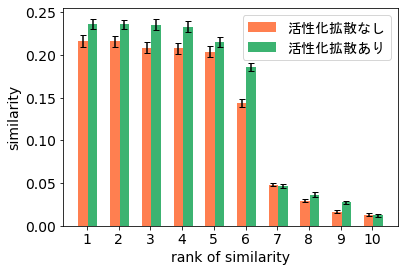

In [613]:
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [4, 3, 3, 4, 5, 6, 7, 8, 9, 10]

x2 = [1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3, 9.3, 10.3]
y2 = [2, 4, 3, 4, 5, 6, 7, 8, 9, 10]

#label_x = ['no exist', 'exist']

# 1つ目の棒グラフ
plt.bar(x1, ls3, color='coral', width=0.3, align="center", label='活性化拡散なし', yerr=ls3_2, capsize=3)
#plt.errorbar(x1, ls3, yerr=ls3_2, marker='x',  capsize=10, lw=1, color='green')

# 2つ目の棒グラフ
plt.bar(x2, ls4, color='mediumseagreen', width=0.3, align="center", label='活性化拡散あり', yerr=ls4_2, capsize=3)

plt.xticks(xtick, x1)
plt.xlabel("rank of similarity",fontsize=14)
plt.ylabel("similarity",fontsize=14)
# 凡例
plt.rcParams.update({'font.size': 14})
plt.legend(prop={"family":"MS Gothic"})

# X軸の目盛りを置換
#plt.xticks([1.15, 2.15], label_x)
plt.savefig('hikaku.png')

In [456]:
simi_cs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.2,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.1,
 0.1,
 0.7,
 0.6,
 0.2,
 0.1,
 0.2,
 0.1,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.0,
 0.2,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.1,
 0.2,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.1,
 0.2,
 0.1,
 0.1,
 0.0,
 0.2,
 0.0,
 0.0

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0, 593, 868, 284, 239, 274, 923, 307, 291, 757, 304], [0, 339, 123, 246, 289, 255, 60, 364, 258, 219, 235], [0, 64, 7, 127, 153, 157, 11, 93, 134, 28, 141], [0, 5, 1, 69, 81, 58, 6, 136, 96, 3, 59], [0, 0, 0, 84, 48, 48, 1, 90, 35, 0, 37], [0, 0, 0, 112, 139, 160, 5, 7, 108, 0, 137], [0, 0, 0, 55, 42, 40, 0, 1, 61, 2, 46], [0, 0, 0, 2, 5, 5, 0, 3, 23, 0, 49], [0, 0, 2, 13, 7, 2, 0, 0, 2, 0, 0], [0, 0, 1, 4, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 7, 1, 2, 0, 6, 0, 0, 2]]
[593, 868, 284, 239, 274, 923, 307, 291, 757, 304]
[339, 123, 246, 289, 255, 60, 364, 258, 219, 235]
[64, 7, 127, 153, 157, 11, 93, 134, 28, 141]
[5, 1, 69, 81, 58, 6, 136, 96, 3, 59]
[0, 0, 84, 48, 48, 1, 90, 35, 0, 37]
[0, 0, 112, 139, 160, 5, 7, 108, 0, 137]
[0, 0, 55, 42, 40, 0, 1, 61, 2, 46]
[0, 0, 2, 5, 5, 0, 3, 23, 0, 49]
[0, 2, 13, 7, 2, 0, 0, 2, 0, 0]
[0, 1, 4, 0, 4, 0, 0, 0, 0, 0]
[0, 0, 7, 1, 2, 0, 6, 0, 0, 2]
[81.95669588264279, 27.33195931505826, 17.8886835

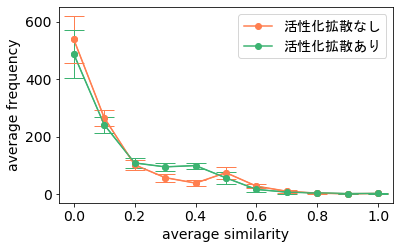

In [612]:
ls = [round(i*0.1,1) for i in range(11)]
hist = [0]*11
hist2 = [0]*11
l_hist = [[0] for i in range(11)]
l_hist2 = [[0] for i in range(11)]
e = []
e2 = []
print(l_hist)
for j in range(10):
    for i in range(len(ls)):
        hist[i] += simi_no[1000*j:(j+1)*1001].count(ls[i])
        hist2[i] += simi_cs[1000*j:(j+1)*1001].count(ls[i])
        l_hist[i].append(simi_no[1000*j:(j+1)*1001].count(ls[i]))
        l_hist2[i].append(simi_cs[1000*j:(j+1)*1001].count(ls[i]))

        
print((l_hist))    
for i in range(len(hist)):
    hist[i] = hist[i]/9
    hist2[i] = hist2[i]/9

for i in range(len(ls)):
    e.append(np.std(l_hist[i][1:]/ np.sqrt(10)))
    e2.append(np.std(l_hist2[i][1:]/ np.sqrt(10)))
    print(l_hist[i][1:])
print(e)
#ax = plt.gca()
#ax.set_yscale('log')
plt.rcParams["font.family"] = "IPAexGothic"
igfont = {'family':'IPAexGothic'}
plt.subplots_adjust(bottom=0.2)
plt.plot(ls, hist,marker="o", label="活性化拡散なし", color='coral')
plt.plot(ls, hist2,marker="o", label="活性化拡散あり", color='mediumseagreen')
plt.errorbar(ls, hist, yerr=e, marker='o', capthick=1, capsize=10, lw=1, color='coral')
plt.errorbar(ls, hist2, yerr=e, marker='o', capthick=1, capsize=10, lw=1, color='mediumseagreen')
plt.rcParams.update({'font.size': 14})
#plt.title("類似度のヒストグラム", fontname="MS Gothic")
plt.legend(prop={"family":"MS Gothic"})
plt.xlabel("average similarity",fontsize=14)
plt.ylabel("average frequency",fontsize=14)
plt.savefig("hist.png")

# 棒グラフ

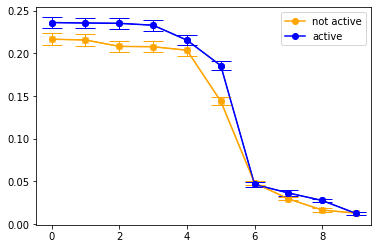

In [476]:
import statistics
ls = []
ls2 = []
e = []
e2 = []
x = [0,1,2,3,4,5,6,7,8,9]
for i in range(10):
    #print(sum(simi_no[i*1000:(i+1)*1001]))
    ls.append([sum(simi_no[i*1000:(i+1)*1001])/1000, np.std(simi_no[i*1000:(i+1)*1001])/ np.sqrt(1000)])
    ls2.append([sum(simi_cs[i*1000:(i+1)*1001])/1000, np.std(simi_cs[i*1000:(i+1)*1001])/ np.sqrt(1000)])
    #e.append(np.std(simi_no[i*1000:(i+1)*1001])/ np.sqrt(1000))
    #e2.append(np.std(simi_cs[i*1000:(i+1)*1001])/ np.sqrt(1000))

ls = sorted(ls,reverse=True)
ls2 = sorted(ls2,reverse=True)

ls3 = []
ls3_2 = []
ls4 = []
ls4_2 = []

for i in ls:
    ls3.append(i[0])
    ls3_2.append(i[1])
for i in ls2:
    ls4.append(i[0])
    ls4_2.append(i[1])

plt.plot(x, ls3, marker="o", label='not active', color='orange')
plt.plot(ls4, marker="o", label='active', color='blue')
plt.legend()

plt.errorbar(x, ls3, yerr=ls3_2, marker='x', capthick=1, capsize=10, lw=1, color='orange')
plt.errorbar(x, ls4, yerr=ls4_2, marker='o', capthick=1, capsize=10, lw=1, color='blue')

plt.savefig("oresen.png")

In [320]:
x1 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y1 = [0]*len(x1)

x2 = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
y2 = [0]*len(x2)

c = collections.Counter(simi_cs)
for i in range(len(c)):
    y1[int(c.most_common()[i][0]*10)-1] = c.most_common()[i][1]*10
    
c = collections.Counter(simi_no)
for i in range(len(c)):
    y2[int(c.most_common()[i][0]*10)-1] = c.most_common()[i][1]*10



label_x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# 1つ目の棒グラフ
plt.bar(x1, y1, color='b', width=0.1, label='Data1', align="center")

plt.bar(x2, y2, color='g', width=0.1, label='Data2', align="center")

# 凡例
plt.legend(loc=2)

# X軸の目盛りを置換
#plt.xticks([1.15, 2.15, 3.15], label_x)
plt.xlim(-0.1,1)
plt.show()

IndexError: list assignment index out of range

# ヒストグラム

C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app
C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


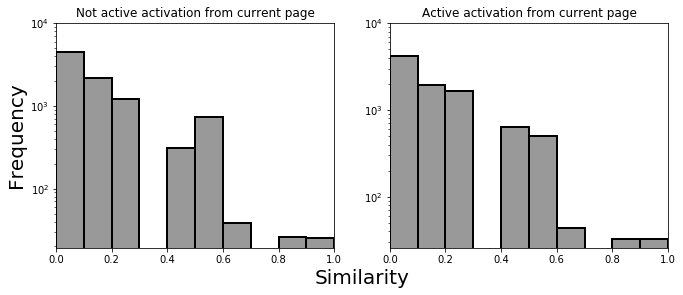

In [455]:
#頻度分布（cs）
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.98)

axL.hist(simi_no[0:9000], linewidth=2,color="0.6", ec='black', log=True)
axL.set_title('Not active activation from current page')
axL.set_xlabel('Similarity', fontsize=20, position=(1.1, 0))
axL.set_ylabel('Frequency', fontsize=20)
axL.set_xlim(0, 1)
axL.set_ylim(0,10000)

axR.hist(simi_cs[0:9000], linewidth=2,color="0.6", ec='black', log=True)
axR.set_title('Active activation from current page')
#axR.set_xlabel('similarity')
#axR.set_ylabel('frequency')
axR.set_xlim(0, 1)
axR.set_ylim(0,10000)

fig.show()
fig.savefig("C:/Users/81906/Documents/simi703.png")

C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


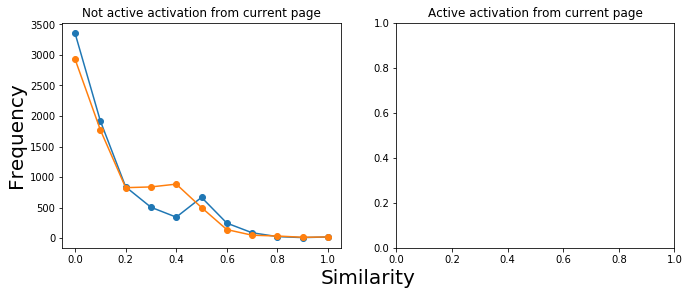

In [163]:
#頻度分布（cs）
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.98)

axL.plot(ls, cl_no, marker="o")
axL.set_title('Not active activation from current page')
axL.set_xlabel('Similarity', fontsize=20, position=(1.1, 0))
axL.set_ylabel('Frequency', fontsize=20)


axL.plot(ls, cl_cs, marker="o")
axR.set_title('Active activation from current page')
#axR.set_xlabel('similarity')
#axR.set_ylabel('frequency')


fig.show()
fig.savefig("C:/Users/81906/Documents/simi703.png")

<BarContainer object of 5 artists>

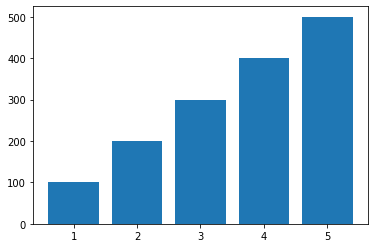

In [152]:
import numpy as np
import matplotlib.pyplot as plt
 
left = [1, 2, 3, 4, 5]
height = [100, 200, 300, 400, 500]
plt.bar(left, height)

C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


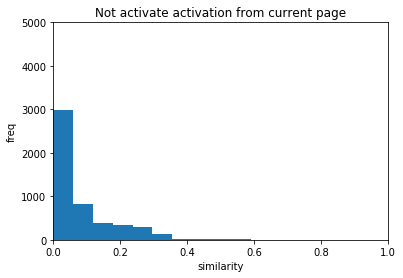

In [311]:
#頻度分布（cs）
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(simi)
ax.set_title('Not activate activation from current page')
ax.set_xlabel('similarity')
ax.set_ylabel('freq')
ax.set_xlim(0,1)
ax.set_ylim(0,5000)
fig.show()
fig.savefig("C:/Users/81906/Documents/actr6/actr6/distr-model/logs/result_img/result2")

C:/Users/81906/Documents/results_normal/tmp\results2.txt
C:/Users/81906/Documents/results_normal/tmp\results3.txt
C:/Users/81906/Documents/results_normal/tmp\results4.txt
C:/Users/81906/Documents/results_normal/tmp\results6.txt
C:/Users/81906/Documents/results_normal/tmp\results7.txt
C:/Users/81906/Documents/results_normal/tmp\results9.txt
24
1002


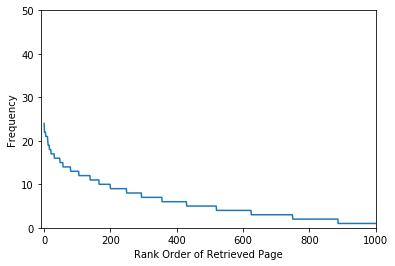

In [785]:
#頻度分布（cs）
import glob
import collections
import re
from matplotlib import pyplot as plt
%matplotlib inline

ls_n = []
files = glob.glob("C:/Users/81906/Documents/results_normal/tmp/*.txt")
for file in files:
    print(file)
    with open(file, mode="r", encoding='utf8') as f:
        for line in f.readlines():
            line_split = re.split( " |t|T", line)
            if len(line_split) > 2 and line_split[2] != "noise":
                ls_n.append(line_split[2])

c = collections.Counter(ls_n)
count = 0
ls_n2 = []
for i in range(len(c)):
    ls_n2.append(c.most_common()[i][1])
plt.ylim(0,50)
plt.xlim(-10,1000)
plt.ylabel("Frequency")
plt.xlabel("Rank Order of Retrieved Page")
plt.plot(ls_n2)
print(max(ls_n2))
#plt.savefig("result1")
print(len(c))

23
1027


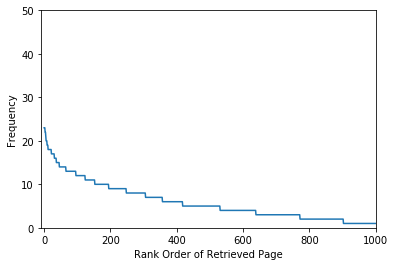

In [786]:
#頻度分布（cs）
import glob
import collections
import re
from matplotlib import pyplot as plt
%matplotlib inline

ls_n = []
files = glob.glob("C:/Users/81906/Documents/results_cs/tmp/*.txt")
for file in files:
    with open(file, mode="r", encoding='utf8') as f:
        for line in f.readlines():
            line_split = re.split( " |t|T", line)
            if len(line_split) > 2 and line_split[2] != "noise":
                ls_n.append(line_split[2])

c = collections.Counter(ls_n)
count = 0
ls_n3 = []
for i in range(len(c)):
    ls_n3.append(c.most_common()[i][1])
plt.ylim(0,50)
plt.xlim(-10,1000)
plt.ylabel("Frequency")
plt.xlabel("Rank Order of Retrieved Page")
plt.plot(ls_n3)
print(max(ls_n3))
#plt.savefig("result1")
print(len(c))

22
915


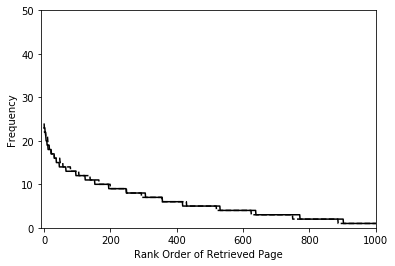

In [788]:
#頻度分布（cs）
import glob
import collections
import re
from matplotlib import pyplot as plt
%matplotlib inline

ls = []
p = 0
files = glob.glob("C:/Users/81906/Documents/results_cs/*.txt")
for file in files:
    with open(file, mode="r", encoding='utf8') as f:
        for line in f.readlines():
            line_split = re.split( " |t|T", line)
            if len(line_split) > 2:
                ls.append(line_split[2])


c = collections.Counter(ls)
count = 0
ls2 = []
for i in range(len(c)):
    ls2.append(c.most_common()[i][1])
plt.ylim(0,50)
plt.xlim(-10,1000)
plt.ylabel("Frequency")
plt.xlabel("Rank Order of Retrieved Page")
#plt.plot(ls2,color="black")
plt.plot(ls_n2, color="black", linestyle="dashed")
plt.plot(ls_n3, color="black")
print(max(ls2))
#plt.savefig("result1")
print(len(c))

In [667]:
import random
import json

json_open = open("C:/Users/81906/Documents/create-chunk/history/historyk.json",mode="r",encoding='utf8')
json_load = json.load(json_open)
target = str(round(random.uniform(1000,1342)))+"t"
for i in range(len(json_load)):
    if json_load[i]["url"] == "http://sig-alst.jp/sig-alst/?page_id=7":
        print(json_load[i]["id"])
        target= json_load[i]["id"]
        break    
print(target)
with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-dm.lisp",mode="w",encoding='utf8') as f2:
    f.read

with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/tmp/img-dm_ori.lisp",mode="r",encoding='utf8') as f:
    with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-dm.lisp",mode="a",encoding='utf8') as f2:
        ls = []
        for line in f.readlines():
            if not target in line:
                f2.write(line)
                
                
with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-param.lisp",mode="w",encoding='utf8') as f2:
    f.read

with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/tmp/img-param_ori.lisp",mode="r",encoding='utf8') as f:
    with open("C:/Users/81906/Documents/actr6/actr6/distr-model/param/img-param.lisp",mode="a",encoding='utf8') as f2:
        ls = []
        for line in f.readlines():
            if not target in line:
                f2.write(line)

1117
1117
